## **Titanic Survivor Predicton**

# **Work Flow** 
    1. Problem Definition
    2. Importing Libraries
    3. Exploratory Data Analysis
    4. Data Visualization 
    5. Encoding the data
    6. Splitting Data
    7. Training Models
    8. Evaluate Model
    9. Prediction

# **Problem Definition**

The outcome of this notebook is to find wether the passenger is survived or not survived (1 or 0) in the titanic ship wreck with the help of certain variables like Age,Sex,Fare,Parch and etc. This is a classification problem were the output is either should be survived or not survived(1 or 0), So we can use classification models like **Random Forest,Decision Trees,Logistic Regression
and Support vector Machines** and we'll find which model gives us the highest accuracy score.

# **Importing Libraries** 

In [754]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline
plt.rcParams['figure.figsize'] = (9,6)

# **Exploratory Data Analysis** 

#### **Reading the Dataset**

In [687]:
df = pd.read_csv("../input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **Finding the Shape of the Dataset**

In [688]:
df.shape

(891, 12)

The dataset as 891 rows and 12 columns

Our Target Variable is **Survived**

#### **Finding the null values that are present in the dataset**

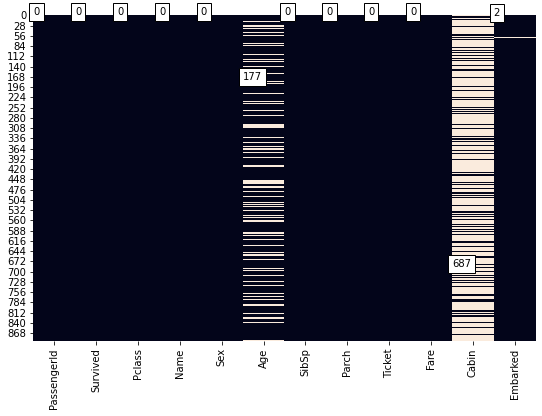

In [689]:
sns.heatmap(df.isnull(),cbar = False)
for index,val in enumerate(df.isnull().sum()):
    plt.text(index,val,str(val),bbox=dict(facecolor='w', alpha=1))
plt.show()

The heatmap shows us wether the column as a null values or not.

With the help of heatmap we came to know that the column **Age has 177 null values and Cabin has 687 null values and Embarked has 2 null values**.

#### **Finding the Dataset info**

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### **Dropping the insignificant columns**

In [691]:
df.drop(["Cabin","Name","PassengerId","Ticket"],axis = 1,inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Dropped the columns Cabin,Name,PassengerId,Ticket because the columns or insignificant for machine learning model


#### **Filling the missing column values with mean and most occurred**

In [692]:
#Filling the missing value with mean in age column
mean = df["Age"].mean()
df["Age"].fillna(mean, inplace = True)

#Filling the missing value with most occured in embarked column
df["Embarked"].fillna("S", inplace = True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### **Converting the Datatype**

In [693]:
#Converting the Age dtype from float to int
df["Age"] = np.round(df["Age"])
df["Age"] = df["Age"].astype(int)

df["Fare"] = np.round(df["Fare"])
df["Fare"] = df["Fare"].astype(int)

#### **Converting the data values for our need**

In [694]:
df["Survived"] = df["Survived"].replace([0,1],["Not Survived","Survived"])

# **Data Visualization** ###

#### **Finding the correlation for visualization**

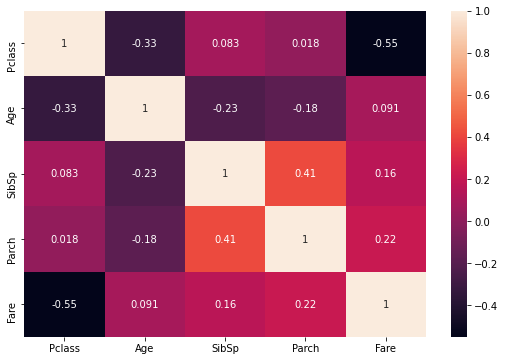

In [695]:
sns.heatmap(df.corr(),annot=True)
plt.show()

* **Survived** variable is positively correlated with **Fare,Pcarch** 
* **Pclass** variable is positively correlated with **Embarked,Sex,Age**
* **Sex** variable is positively correlated with **Embarked,Pclass,Age**
* **Age** variable is positively correlated with **Fare,Sex**
* **SibSp** variable is positively correlated with **Fare,Parch,Pclass**
* **Parch** variable is positively correlated with **Embarked,Fare,SibSp,Pclass and Survived**
* **Fare** variable is positively correlated with **Parch,SibSp,Age and Survived**
* **Embarked** variable is positively correlated with **Parch,Pclass,Sex,Pclass**

#### **Visualizing the Pclass Variable**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


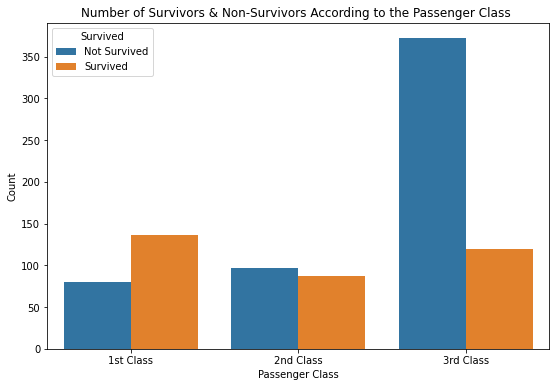

In [696]:
x= [0,1,2]
sns.countplot("Pclass", data = df, hue ="Survived")
labels = ["1st Class","2nd Class","3rd Class"]
plt.title("Number of Survivors & Non-Survivors According to the Passenger Class ")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.xticks(x, labels)
plt.show()

From the above plot we come to know that the people in **1st Class were mostly survived**

#### **Visualizing the Sex Variable**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


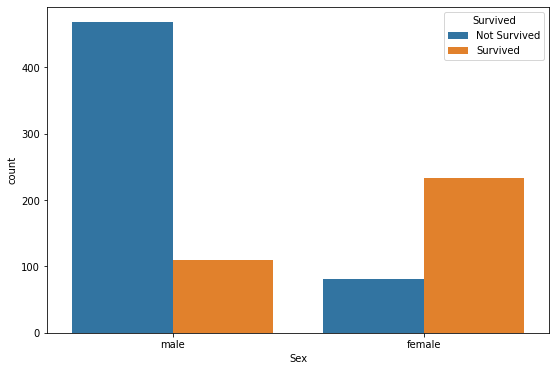

In [697]:
sns.countplot("Sex", data = df, hue ="Survived")
plt.show()


From the above plot we come to know that **number of more female's were survived when compared to male**.

#### **Visualizing the Age Variable**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


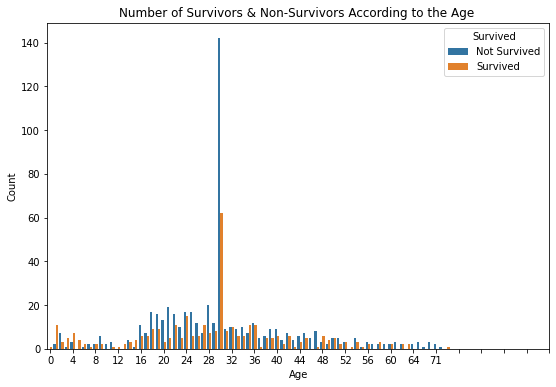

In [698]:
sns.countplot("Age",data = df, hue = "Survived")
plt.title("Number of Survivors & Non-Survivors According to the Age ")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(range(0,90,4))
plt.show()

From the above chart we come to know that the people between the **28 to 32** were survived the most.


#### **Visualizing the Embarked Variable**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


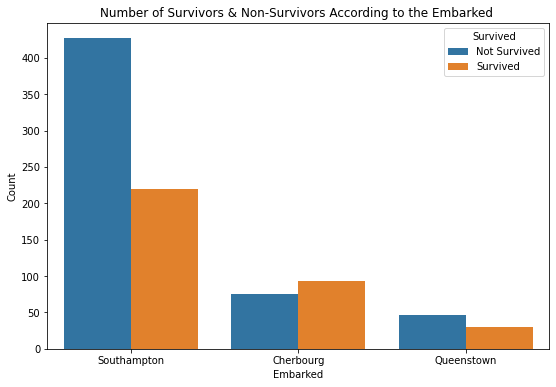

In [699]:
x = [0,1,2]
sns.countplot("Embarked", data = df, hue ="Survived")
labels = ["Southampton","Cherbourg", "Queenstown"]
plt.title("Number of Survivors & Non-Survivors According to the Embarked ")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.xticks(x,labels)
plt.show()

# **Encoding the Data**

#### **Encoding the Dataset with LabelEncoder**

In [700]:
le = LabelEncoder()

In [701]:
for val in df.columns:
    if df[val].dtype == "O":
        df[val] = le.fit_transform(df[val])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,2
1,1,1,0,38,1,0,71,0
2,1,3,0,26,0,0,8,2
3,1,1,0,35,1,0,53,2
4,0,3,1,35,0,0,8,2


#### **Encoding the Dataset with Dummy Values and Concating it**

In [702]:
df1 = pd.get_dummies(df["Pclass"]).rename({1:"1st Class",2:"2nd Class",3:"3rd Class"},axis = 1)

df1["1st Class"] = df1["1st Class"].astype(int)
df1["2nd Class"] = df1["2nd Class"].astype(int)
df1["3rd Class"] = df1["3rd Class"].astype(int)

In [703]:
df['Small Family'] = np.where((df['SibSp'] <= 2) & (df['SibSp'] != 0), 1, 0)
df['Lonely Child'] = np.where(df['Parch'] == 1, 1, 0)

df['Family'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Small Family,Lonely Child,Family
0,0,3,1,22,1,0,7,2,1,0,1
1,1,1,0,38,1,0,71,0,1,0,1
2,1,3,0,26,0,0,8,2,0,0,0
3,1,1,0,35,1,0,53,2,1,0,1
4,0,3,1,35,0,0,8,2,0,0,0


#### **Concating the Datasets**

In [704]:
df2 = pd.concat([df, df1], axis=1)

#### **Dropping the Insignificant Variables**

In [705]:
df2.drop(["Pclass","SibSp","Parch"],axis = 1, inplace = True)

#### **Visualizing the correlations in the dataset**

<AxesSubplot:>

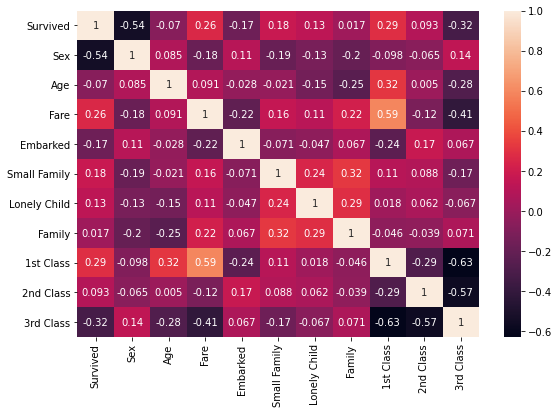

In [706]:
sns.heatmap(df2.corr(),annot = True)

In [707]:
df2.head()

,Survived,Sex,Age,Fare,Embarked,Small Family,Lonely Child,Family,1st Class,2nd Class,3rd Class
0,0,1,22,7,2,1,0,1,0,0,1
1,1,0,38,71,0,1,0,1,1,0,0
2,1,0,26,8,2,0,0,0,0,0,1
3,1,0,35,53,2,1,0,1,1,0,0
4,0,1,35,8,2,0,0,0,0,0,1


# **Train Test and Split**

#### **Spliting the dataset into two for training and testing purpose**

In [708]:
X = df2.drop(columns = "Survived",axis =1)
Y = df2["Survived"]

In [716]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# **Training Models**

### **Logistic Regression**

In [730]:
lo = LogisticRegression(solver='liblinear')

##### **Train Model**

In [749]:
xtrain_predict = lo.fit(xtrain,ytrain)
xtrain_predict = lo.predict(xtrain)
lo_train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_lo_as = accuracy_score(xtrain_predict,ytrain)
print("LogisticRegression Train Data Accuracy Score: ",train_lo_as)
print()
lo_train_predict.head()


LogisticRegression Train Data Accuracy Score:  0.8103932584269663



,Predicted Value,Actual Value
140,1,0
439,0,0
817,0,0
378,0,0
491,0,0


##### **Test Model**

In [735]:
xtest_predict = lo.fit(xtest,ytest)
xtest_predict = lo.predict(xtest)
lo_test_predict = pd.DataFrame({"Predicted Value" : xtest_predict,
                              "Actual Value" : ytest
})
test_lo_as = accuracy_score(xtest_predict,ytest)
print("LogisticRegression Test Data Accuracy Score: ",test_lo_as)
print()
lo_train_predict.tail()


LogisticRegression Test Data Accuracy Score:  0.8100558659217877



,Predicted Value,Actual Value
835,1,1
192,1,1
629,0,0
559,1,1
684,0,0


### **Random Forest**

In [736]:
rf = RandomForestClassifier()

##### **Train Model**

In [750]:
rf.fit(xtrain, ytrain)
xtrain_predict = rf.predict(xtrain)
rf_train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_rf_as = accuracy_score(xtrain_predict,ytrain)
print("Random Forest Train Data Accuracy Score: ",train_rf_as)
print()
rf_train_predict.head()

Random Forest Train Data Accuracy Score:  0.9592696629213483



,Predicted Value,Actual Value
140,0,0
439,0,0
817,0,0
378,0,0
491,0,0


##### **Test Model**

In [748]:
xtest_predict = rf.fit(xtest,ytest)
xtest_predict = rf.predict(xtest)
rf_test_predict = pd.DataFrame({"Predicted Value" : xtest_predict,
                              "Actual Value" : ytest
})
test_rf_as = accuracy_score(xtest_predict,ytest)
print("Random Forest Test Data Accuracy Score: ",test_rf_as)
print()
rf_test_predict.head()


Random Forest Test Data Accuracy Score:  1.0



,Predicted Value,Actual Value
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


### **Decision Tree**

In [742]:
dt = DecisionTreeClassifier()

##### **Train Model**

In [751]:
dt.fit(xtrain, ytrain)
xtrain_predict = dt.predict(xtrain)
dt_train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_dt_as = accuracy_score(xtrain_predict,ytrain)
print("Decision Tree Classifier Train Data Accuracy Score: ",train_dt_as)
print()
dt_train_predict.head()

Decision Tree Classifier Train Data Accuracy Score:  0.9592696629213483



,Predicted Value,Actual Value
140,0,0
439,0,0
817,0,0
378,0,0
491,0,0


##### **Test Model**

In [752]:
xtest_predict = dt.fit(xtest,ytest)
xtest_predict = dt.predict(xtest)
dt_test_predict = pd.DataFrame({"Predicted Value" : xtest_predict,
                              "Actual Value" : ytest
})
test_dt_as = accuracy_score(xtest_predict,ytest)
print("Random Forest Test Data Accuracy Score: ",test_dt_as)
print()
dt_test_predict.head()


Random Forest Test Data Accuracy Score:  1.0



,Predicted Value,Actual Value
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


### **Support Vector Machines**

In [756]:
svm = SVC(kernel='rbf', C=100)

##### **Train Model**

In [757]:
svm.fit(xtrain, ytrain)
xtrain_predict = svm.predict(xtrain)
svm_train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_svm_as = accuracy_score(xtrain_predict,ytrain)
print("Support Vector Machine Train Data Accuracy Score: ",train_svm_as)
print()
svm_train_predict.head()

Support Vector Machine Train Data Accuracy Score:  0.824438202247191



,Predicted Value,Actual Value
140,1,0
439,0,0
817,0,0
378,0,0
491,0,0


##### **Test Model**

In [758]:
xtest_predict = svm.fit(xtest,ytest)
xtest_predict = svm.predict(xtest)
svm_test_predict = pd.DataFrame({"Predicted Value" : xtest_predict,
                              "Actual Value" : ytest
})
test_svm_as = accuracy_score(xtest_predict,ytest)
print("Random Forest Test Data Accuracy Score: ",test_svm_as)
print()
svm_test_predict.head()

Random Forest Test Data Accuracy Score:  0.8100558659217877



,Predicted Value,Actual Value
495,0,0
648,0,0
278,0,0
31,1,1
255,0,1


## **Finding the Best Model with the help of Accuracy Score**

In [767]:
Train = [train_lo_as,train_rf_as,train_dt_as,train_svm_as]
Test = [test_lo_as,test_rf_as,test_dt_as,test_svm_as]

Accuracy_Score = pd.DataFrame({"Train Score": Train,"Test Score":Test})
Accuracy_Score.index = ["LogisticRegression", "RandomForest", "DecisionTreeClassifier", "SupportVectorMachine"]
Accuracy_Score

,Train Score,Test Score
LogisticRegression,0.810393,0.810056
RandomForest,0.959270,1.000000
DicisionTreeClassifier,0.959270,1.000000
SupportVectorMachine,0.824438,0.810056


# **Conclusion**

**RandomForest and DecisionTreeClassifier has the highest accuracy score.**

# **Thank You!!**